In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


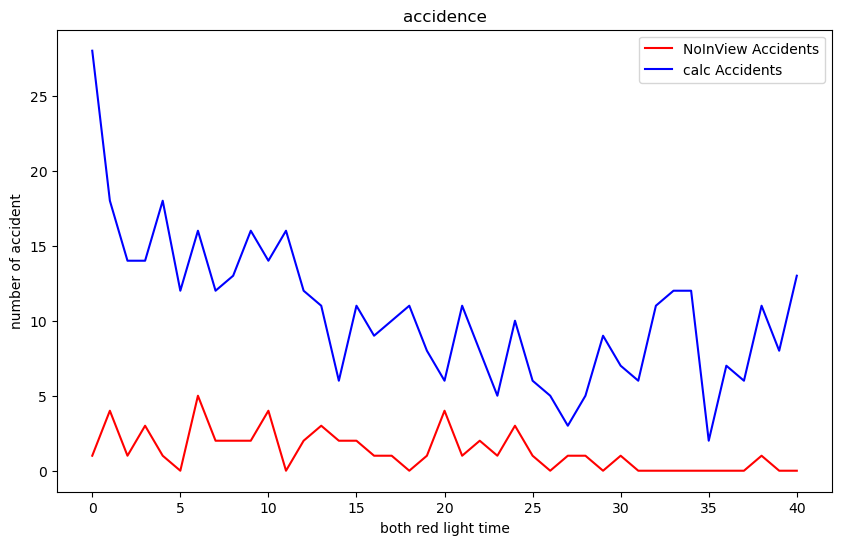

In [5]:
file_path = 'data/experiment-bothred.csv'
df = pd.read_csv(file_path)

# 使用numpy分割数据框
num_cols = df.shape[1]
split_dfs = np.split(df, num_cols // 4, axis=1)

# 删除每组的第一个元素（列）
split_dfs = [df_group.drop(df_group.columns[0], axis=1) for df_group in split_dfs]

# 创建一个字典，将键从20分配给每个组,观测范围
result_dict = {}
key_start = 0

for i, split_df in enumerate(split_dfs):
    # 将数据框转换为列表形式
    split_list = split_df.values.tolist()
    # 将列表存储到字典中
    result_dict[key_start + i] = split_list

# 显示最终字典
#print(result_dict)

# 提取x轴（keys）和y轴（每个list的第二个元素）
x_values = list(result_dict.keys())
y_values = [value[0][1] for value in result_dict.values()]  # 假设只取每组中第一行的第二个元素
# print(y_values)

# 提取y轴（每个list的第3个元素）
y2_values = [value[0][2] for value in result_dict.values()]  # 假设只取每组中第一行的第二个元素
# print(y2_values)

# 创建图表
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='', linestyle='-', color='r', label='NoInView Accidents')
plt.plot(x_values, y2_values, marker='', linestyle='-', color='b', label='calc Accidents')

# 设置标题和标签
plt.title('accidence')
plt.xlabel('both red light time')
plt.ylabel('number of accident')
plt.legend()

# 显示图表
plt.show()

回归系数 (Slope): -0.2588850174216028
截距 (Intercept): 15.714285714285715
均方误差 (Mean Squared Error): 13.548585025919945
R² (Coefficient of Determination): 0.40917372033383237
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     27.01
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           6.71e-06
Time:                        14:12:37   Log-Likelihood:                -111.61
No. Observations:                  41   AIC:                             227.2
Df Residuals:                      39   BIC:                             230.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err        

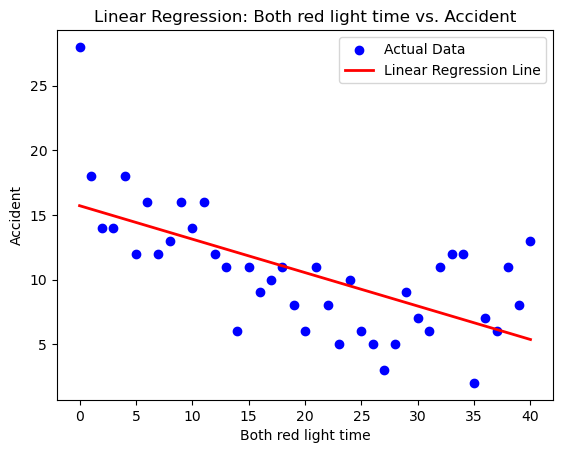

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# 示例数据
# 假设你有两个列表，一个是观测距离，另一个是对应的交通事故概率
observation_distance = np.array(x_values)
accident_probability = np.array(y2_values)

# 创建线性回归模型（使用 sklearn 进行拟合）
model = LinearRegression()

# 拟合模型
model.fit(observation_distance.reshape(-1, 1), accident_probability)

# 预测值
predicted_probabilities = model.predict(observation_distance.reshape(-1, 1))

# 输出回归系数
print(f"回归系数 (Slope): {model.coef_[0]}")
print(f"截距 (Intercept): {model.intercept_}")

# 计算模型性能
mse = mean_squared_error(accident_probability, predicted_probabilities)
r2 = r2_score(accident_probability, predicted_probabilities)
print(f"均方误差 (Mean Squared Error): {mse}")
print(f"R² (Coefficient of Determination): {r2}")

# 使用 statsmodels 计算 p 值
X = sm.add_constant(observation_distance)  # 添加常数项（截距）
model_sm = sm.OLS(accident_probability, X).fit()
print(model_sm.summary())

# 可视化回归结果
plt.scatter(observation_distance, accident_probability, color='blue', label='Actual Data')
plt.plot(observation_distance, predicted_probabilities, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Both red light time')
plt.ylabel('Accident')
plt.title('Linear Regression: Both red light time vs. Accident')
plt.legend()
plt.show()


R²: 0.6342
Adjusted R²: 0.6149
Mean Squared Error (MSE): 8.3884
Root Mean Squared Error (RMSE): 2.8963


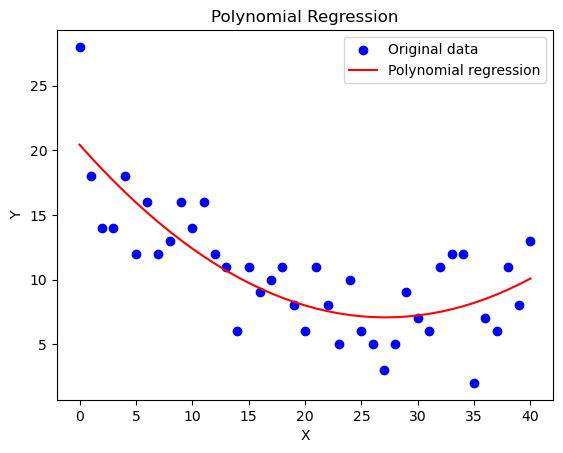

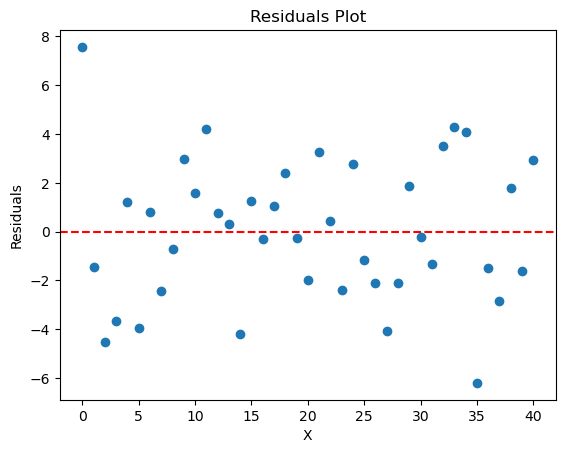

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 示例数据
x = np.array(x_values)
y = np.array(y2_values)

# 将x数组转换为二维数组，因为sklearn的模型要求输入特征是二维的
x = x.reshape(-1, 1)

# 创建多项式特征，degree=2表示二次多项式
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

# 创建线性回归模型并拟合多项式特征
model = LinearRegression()
model.fit(x_poly, y)

# 进行预测
y_pred = model.predict(x_poly)

# 计算评估指标
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# 调整后的R²计算
n = len(y)  # 样本数量
p = x_poly.shape[1] - 1  # 模型中的特征数量（包括多项式生成的特征）
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# 输出评估结果
print(f'R²: {r2:.4f}')
print(f'Adjusted R²: {adjusted_r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# 可视化回归曲线
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x, y_pred, color='red', label='Polynomial regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# 残差分析
residuals = y - y_pred
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In [7]:
# 找到最大值的位置和数值
max_value = max(y2_values)
max_index = y2_values.index(max_value)
max_redtime = x_values[max_index]
# 找到最小值的位置和数值
min_value = min(y2_values)
min_index = y2_values.index(min_value)
min_redtime = x_values[min_index]

# 计算平均值
average_value = sum(y2_values) / len(y2_values)

# 输出结果
print(f"最大值 (Max): {max_value}，绿灯时间 (Index): {max_redtime}")
print(f"最小值 (Min): {min_value}，绿灯时间 (Index): {min_redtime}")
print(f"平均值 (Average): {average_value}")

最大值 (Max): 28，绿灯时间 (Index): 0
最小值 (Min): 2，绿灯时间 (Index): 35
平均值 (Average): 10.536585365853659
